In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

In [170]:
kano_responses_raw = pd.read_csv("responses.csv")
kano_responses_raw.describe()

,Age group,Gender,Occupation,How would you feel if Netflix DOES have 4k streaming?,How would you feel if Netflix DOES NOT have 4k streaming?,How would you feel if Netflix DOES have personalized recommendations?,How would you feel if Netflix DOES NOT have personalized recommendations?,How would you feel if Netflix DOES have offline viewing (downloading)?,How would you feel if Netflix DOES NOT have offline viewing (downloading)?,How would you feel if Netflix DOES have multi device support?,...,How would you feel if Netflix DOES have advanced audio features?,How would you feel if Netflix DOES NOT have advanced audio features?,How would you feel if Netflix DOES have child profiles with additional parental controls?,How would you feel if Netflix DOES NOT have child profiles with additional parental controls?,How would you feel if Netflix DOES have friend activity?,How would you feel if Netflix DOES NOT have friend activity?,How would you feel if Netflix DOES have pay-per-view films that release alongside theater?,How would you feel if Netflix DOES NOT have pay-per-view films that release alongside theater?,How would you feel if Netflix DOES have surprise me?,How would you feel if Netflix DOES NOT have surprise me?
count,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
unique,4,3,7,5,4,3,4,3,3,2,...,3,3,4,3,4,4,5,5,3,4
top,18 - 24,Male,Student,I like it,I can tolerate it,I like it,I dislike it,I like it,I can tolerate it,I like it,...,I like it,I'm neutral to it,I like it,I'm neutral to it,I like it,I'm neutral to it,I like it,I can tolerate it,I like it,I'm neutral to it
freq,16,14,16,10,13,12,10,17,10,14,...,11,10,10,9,8,10,7,7,17,12


---
## Continuous Analysis

In [171]:
functional_scores = {
    "I like it": 4,
    "I expect it": 2,
    "I'm neutral to it": 0,
    "I can tolerate it": -1,
    "I dislike it": -2
}
dysfunctional_scores = {
    "I like it": -2,
    "I expect it": -1,
    "I'm neutral to it": 0,
    "I can tolerate it": 2,
    "I dislike it": 4
}

In [174]:
scores_raw = kano_responses_raw.iloc[:, 3:]
scores_raw.describe()

scores = scores_raw.copy()
for i in range(0, scores.shape[1], 2):
    scores.iloc[:, i] = scores_raw.iloc[:, i].map(functional_scores)
    scores.iloc[:, i+1] = scores_raw.iloc[:, i+1].map(dysfunctional_scores)


In [175]:
scores_avg = scores.mean(axis=0)
scores_avg

How would you feel if Netflix DOES have 4k streaming?                                             2.227273
How would you feel if Netflix DOES NOT have 4k streaming?                                              1.5
How would you feel if Netflix DOES have personalized recommendations?                             2.954545
How would you feel if Netflix DOES NOT have personalized recommendations?                         2.318182
How would you feel if Netflix DOES have offline viewing (downloading)?                            3.363636
How would you feel if Netflix DOES NOT have offline viewing (downloading)?                        2.363636
How would you feel if Netflix DOES have multi device support?                                     3.272727
How would you feel if Netflix DOES NOT have multi device support?                                 3.272727
How would you feel if Netflix DOES have profile support?                                          2.909091
How would you feel if Netflix DOES NO

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/4208234827.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(scores_avg[2*i + 1], scores_avg[2*i], str(i + 1))


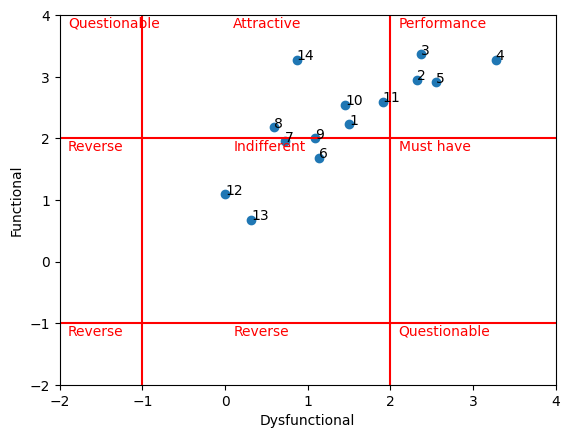

In [177]:
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.scatter(scores_avg[1::2], scores_avg[0::2])
for i in range(len(scores_avg)//2):
    plt.text(scores_avg[2*i + 1], scores_avg[2*i], str(i + 1))

plt.axvline(x=2, color='r')
plt.axhline(y=2, color='r')
plt.axhline(y=-1, color='r')
plt.axvline(x=-1, color='r')

plt.xlabel("Dysfunctional")
plt.ylabel("Functional")

plt.text(2.1, 1.8, "Must have", fontsize=10, color='r')
plt.text(2.1, 3.8, "Performance", fontsize=10, color='r')
plt.text(0.1, 3.8, "Attractive", fontsize=10, color='r')
plt.text(0.1, 1.8, "Indifferent", fontsize=10, color='r')
plt.text(-1.9, 1.8, "Reverse", fontsize=10, color='r')
plt.text(-1.9, 3.8, "Questionable", fontsize=10, color='r')
plt.text(-1.9, -1.2, "Reverse", fontsize=10, color='r')
plt.text(0.1, -1.2, "Reverse", fontsize=10, color='r')
plt.text(2.1, -1.2, "Questionable", fontsize=10, color='r')

plt.savefig("media/continuous_analysis.png", dpi=300)

--- 
## Discrete Analysis

In [178]:
feature_names = ["High Resolution Streaming (4K)",
                "Personalized Recommendations",
                "Offline Viewing",
                "Multi-Device Support",
                "User Profiles",
                "Ad-Supported Pricing Plan",
                "Watch Party",
                "Interactive Content",
                "Top 10 in Your Country",
                "Advanced Audio Features",
                "Child Profiles (Extra Parental Controls)",
                "What Are My Friends Watching",
                "Pay-per-view Films Released Alongside Theater",
                "Surprise Me"]

In [179]:
functional_scores_discrete = {
    "I like it": 0,
    "I expect it": 1,
    "I'm neutral to it": 2,
    "I can tolerate it": 3,
    "I dislike it": 4
}
dysfunctional_scores_discrete = {
    "I like it": 0,
    "I expect it": 1,
    "I'm neutral to it": 2,
    "I can tolerate it": 3,
    "I dislike it": 4
}

scores_discrete = scores_raw.copy()
for i in range(0, scores_discrete.shape[1], 2):
    scores_discrete.iloc[:, i] = scores_raw.iloc[:, i].map(
        functional_scores_discrete)
    scores_discrete.iloc[:, i+1] = scores_raw.iloc[:, i+1].map(dysfunctional_scores_discrete)

categories_map = [["Questionable", "Attractive", "Attractive", "Attractive", "Performance"], 
              ["Reverse", "Questionable", "Indifferent", "Indifferent", "Must have"], 
              ["Reverse", "Indifferent", "Indifferent", "Indifferent", "Must have"], 
              ["Reverse", "Indifferent", "Indifferent", "Questionable", "Must have"], 
              ["Reverse", "Reverse", "Reverse", "Reverse", "Questionable"]]

categories = []
for i in range(scores_discrete.shape[0]):
    cat = []
    for j in range(0, scores_discrete.shape[1], 2):
        cat.append(categories_map[scores_discrete.iloc[i, j]][scores_discrete.iloc[i, j+1]])
    categories.append(cat)

categories = pd.DataFrame(categories)

In [180]:
categories

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Attractive,Performance,Performance,Indifferent,Indifferent,Attractive,Indifferent,Indifferent,Must have,Indifferent,Indifferent,Attractive,Indifferent,Indifferent
1,Indifferent,Performance,Attractive,Performance,Attractive,Reverse,Attractive,Indifferent,Indifferent,Performance,Attractive,Indifferent,Indifferent,Attractive
2,Questionable,Indifferent,Attractive,Performance,Performance,Indifferent,Indifferent,Indifferent,Indifferent,Must have,Attractive,Reverse,Indifferent,Attractive
3,Indifferent,Attractive,Performance,Performance,Must have,Performance,Performance,Indifferent,Attractive,Attractive,Attractive,Attractive,Reverse,Attractive
4,Indifferent,Performance,Performance,Performance,Attractive,Reverse,Attractive,Attractive,Performance,Attractive,Indifferent,Reverse,Reverse,Attractive
5,Attractive,Performance,Attractive,Must have,Must have,Indifferent,Indifferent,Attractive,Indifferent,Indifferent,Indifferent,Indifferent,Reverse,Attractive
6,Attractive,Questionable,Indifferent,Performance,Performance,Questionable,Indifferent,Attractive,Indifferent,Performance,Performance,Reverse,Indifferent,Attractive
7,Performance,Indifferent,Indifferent,Performance,Performance,Reverse,Indifferent,Indifferent,Indifferent,Indifferent,Indifferent,Indifferent,Indifferent,Indifferent
8,Attractive,Attractive,Attractive,Performance,Performance,Indifferent,Attractive,Attractive,Attractive,Attractive,Must have,Reverse,Reverse,Indifferent
9,Indifferent,Indifferent,Indifferent,Indifferent,Must have,Must have,Must have,Attractive,Reverse,Indifferent,Attractive,Indifferent,Attractive,Indifferent


In [205]:
category_counts = categories.apply(pd.Series.value_counts)
category_counts = category_counts.fillna(0)
category_counts.columns = category_counts.columns + 1
category_counts = category_counts.T
category_counts.to_csv("media/category_counts.csv")
category_counts

,Attractive,Indifferent,Must have,Performance,Questionable,Reverse
1,8.0,10.0,0.0,2.0,1.0,1.0
2,6.0,5.0,4.0,6.0,1.0,0.0
3,9.0,5.0,0.0,8.0,0.0,0.0
4,4.0,3.0,5.0,10.0,0.0,0.0
5,5.0,5.0,6.0,6.0,0.0,0.0
6,6.0,6.0,1.0,3.0,2.0,4.0
7,9.0,11.0,1.0,1.0,0.0,0.0
8,12.0,10.0,0.0,0.0,0.0,0.0
9,6.0,12.0,1.0,2.0,0.0,1.0
10,8.0,10.0,1.0,3.0,0.0,0.0


In [183]:
category_max = category_counts.idxmax(axis=0)
category_max

1     Indifferent
2      Attractive
3      Attractive
4     Performance
5       Must have
6      Attractive
7     Indifferent
8      Attractive
9     Indifferent
10    Indifferent
11    Indifferent
12     Attractive
13    Indifferent
14     Attractive
dtype: object

In [189]:
category_max.value_counts()

Indifferent    6
Attractive     6
Performance    1
Must have      1
Name: count, dtype: int64

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/3600205109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), ax=axs[i//2, i%2], palette=[colors[x] for x in categories[i].value_counts().index])
/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/3600205109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), ax=axs[i//2, i%2], palette=[colors[x] for x in categories[i].value_counts().index])
/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/3600205109.py:10: FutureWarning: 

Passing `palette` without assign

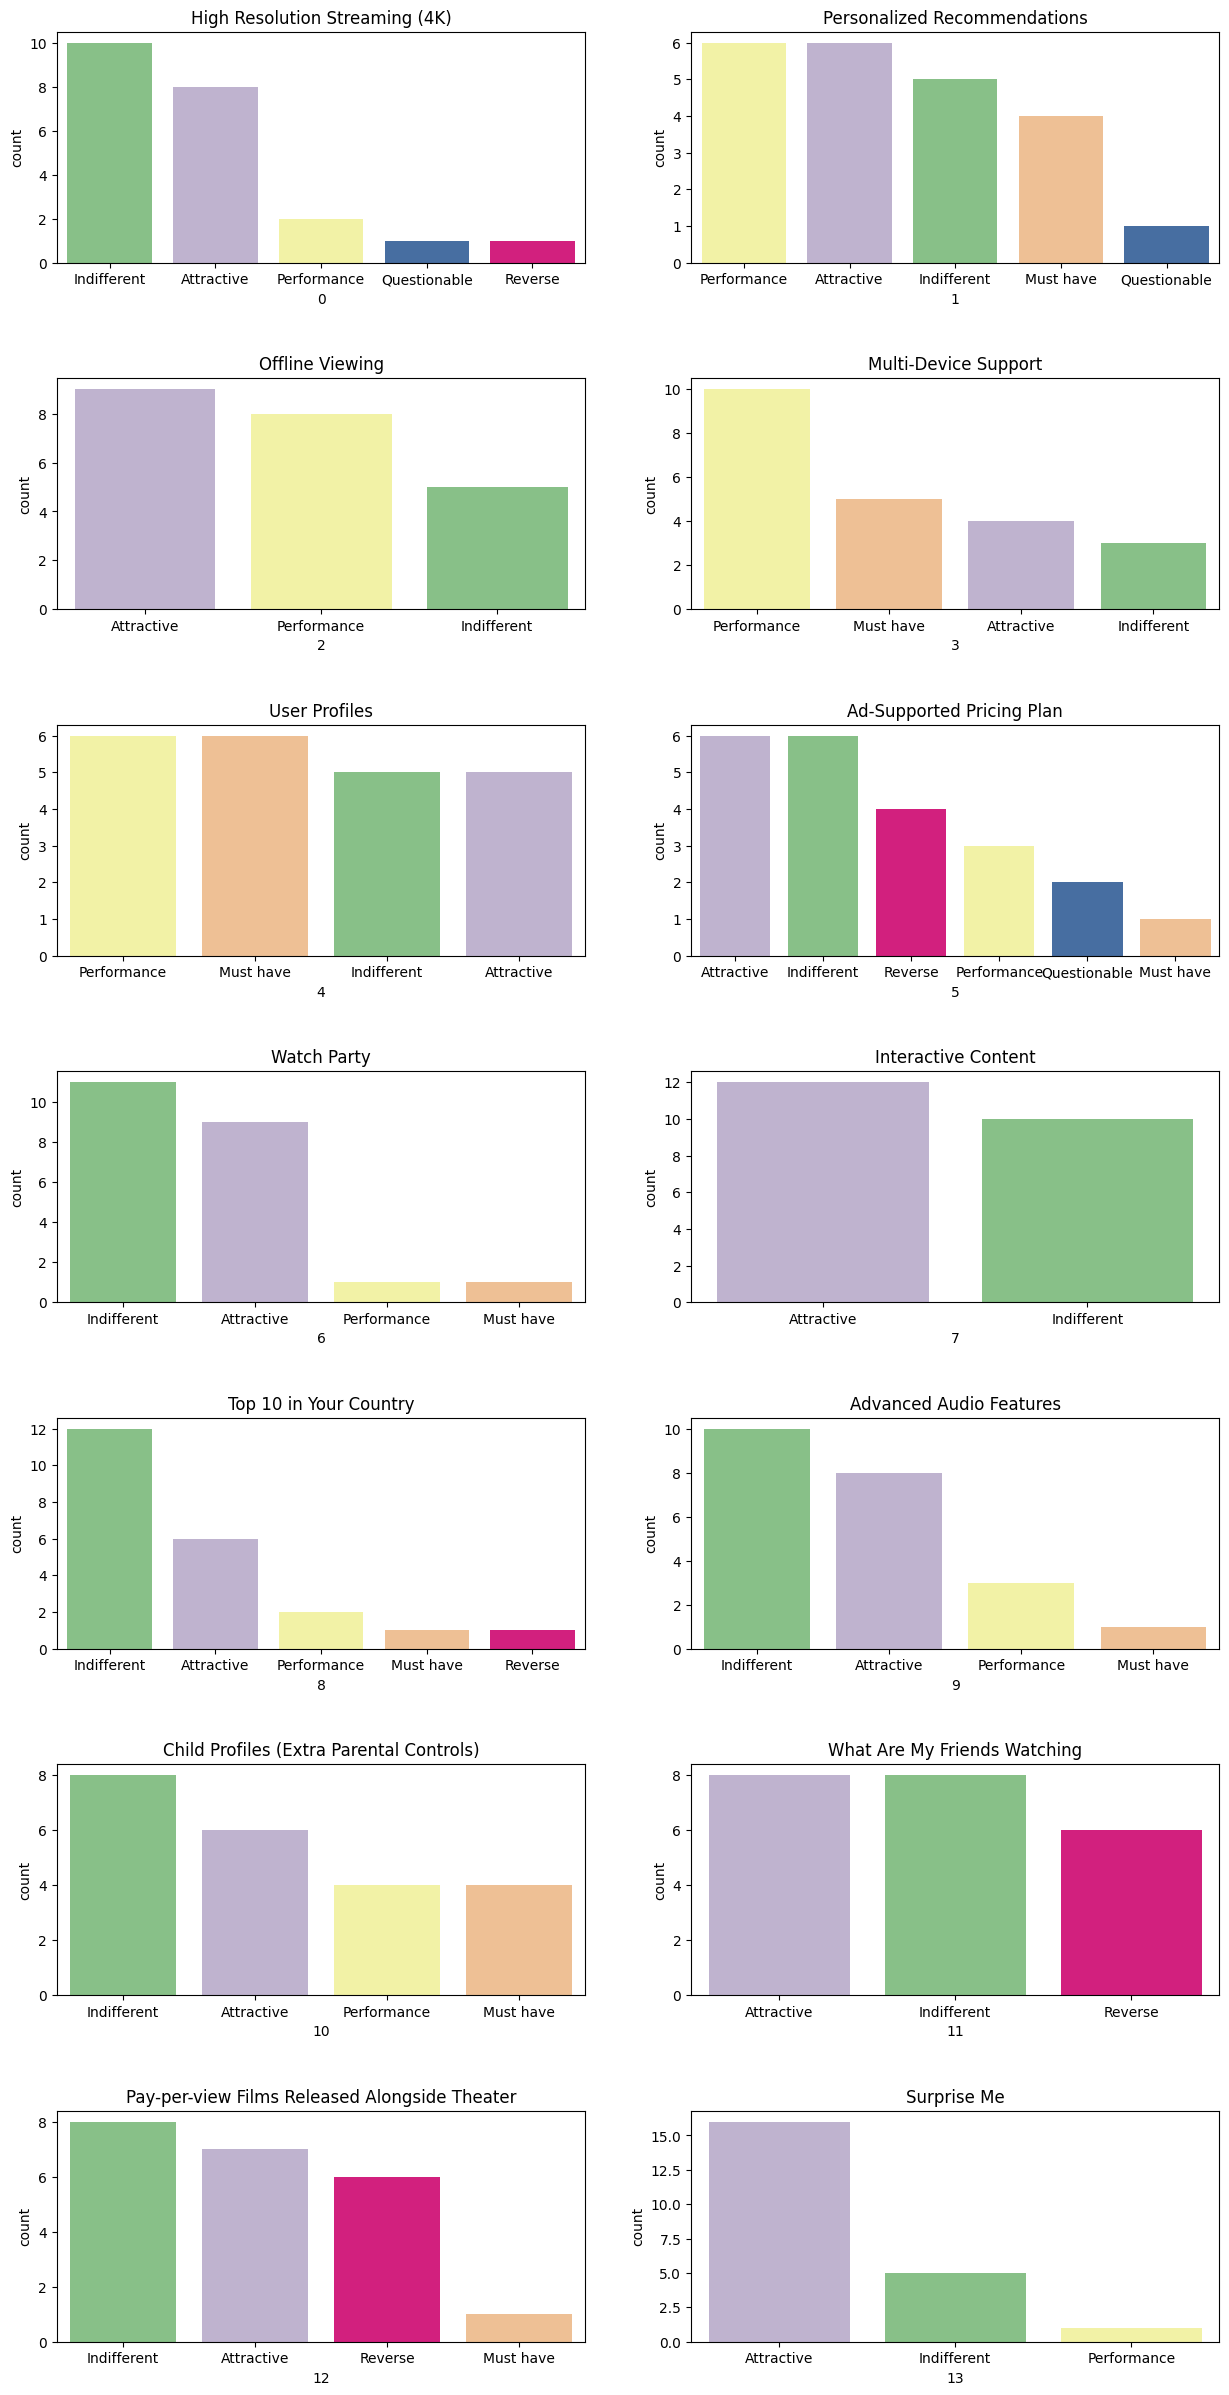

In [201]:
fig, axs = plt.subplots(7, 2)
fig.set_size_inches(15, 30)
fig.subplots_adjust(hspace=0.5)

colors = { label: color  for label, color in zip(['Indifferent', 'Attractive', 'Must have', 'Performance', 'Questionable', 'Reverse'], colormaps["Accent"].colors) }
for i in range(categories.shape[1]):
    # axs[i//2, i%2].pie(categories[i].value_counts(), labels=categories[i].value_counts().index, autopct='%1.1f%%', colors=[colors[x] for x in categories[i].value_counts().index])
    # axs[i//2, i%2].bar(categories[i].value_counts().index, categories[i].value_counts())
    sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), ax=axs[i//2, i%2], palette=[colors[x] for x in categories[i].value_counts().index])
    axs[i//2, i%2].set_title(feature_names[i])
plt.show()

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


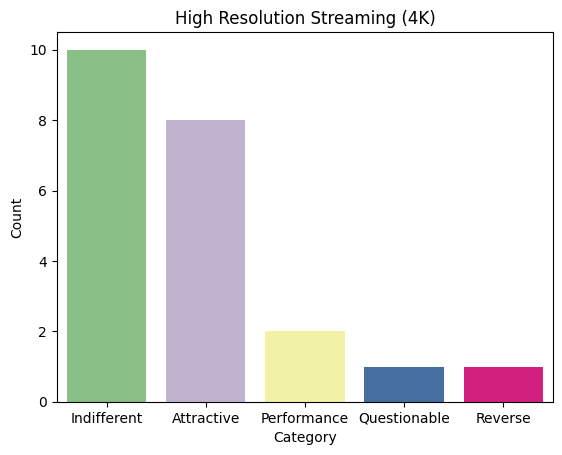

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


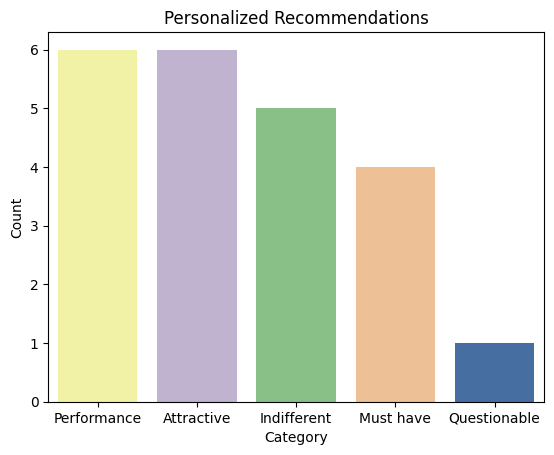

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


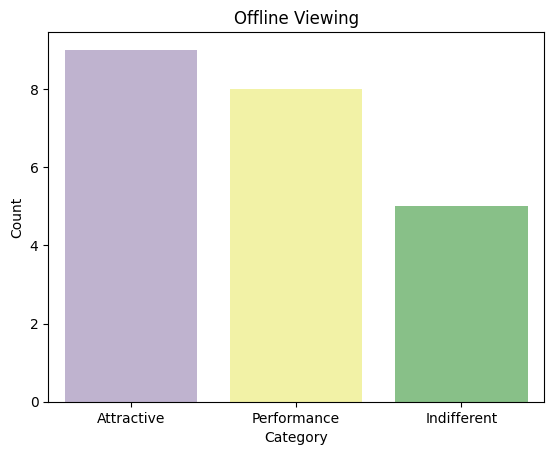

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


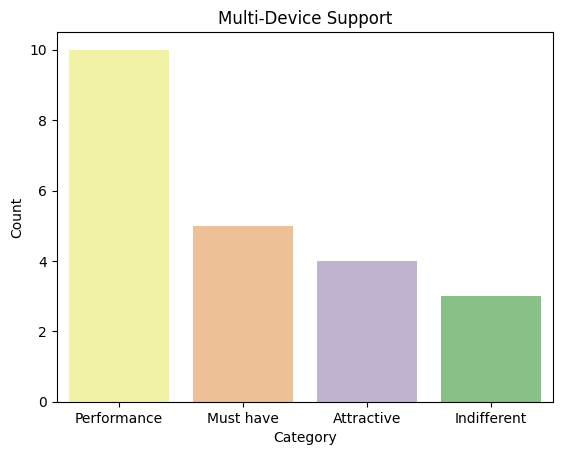

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


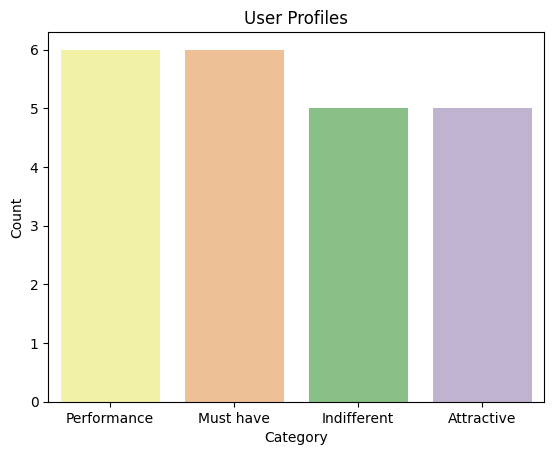

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


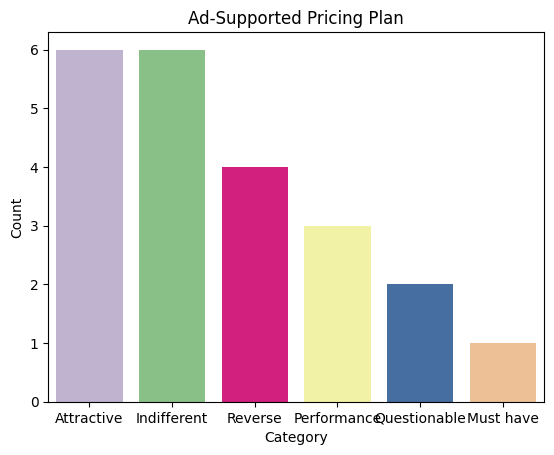

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


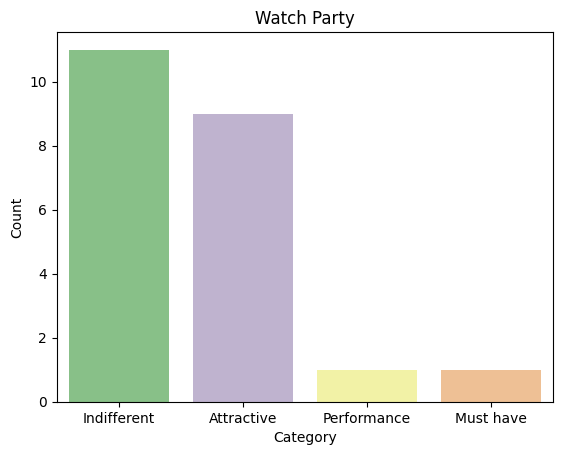

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


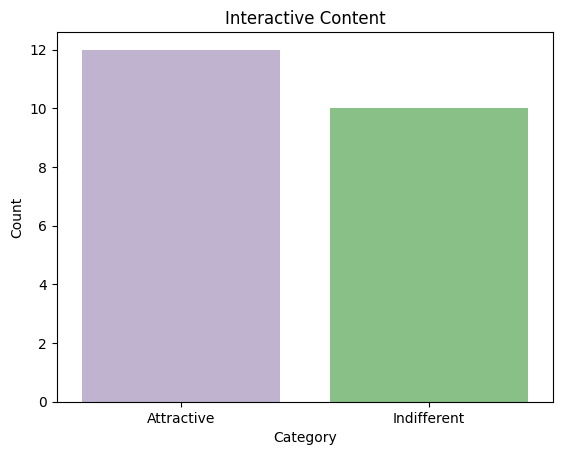

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


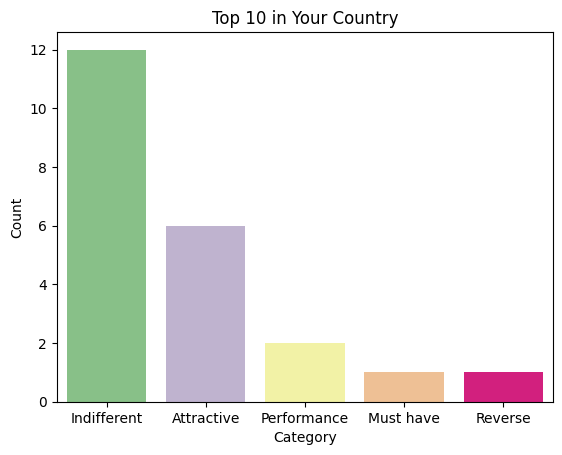

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


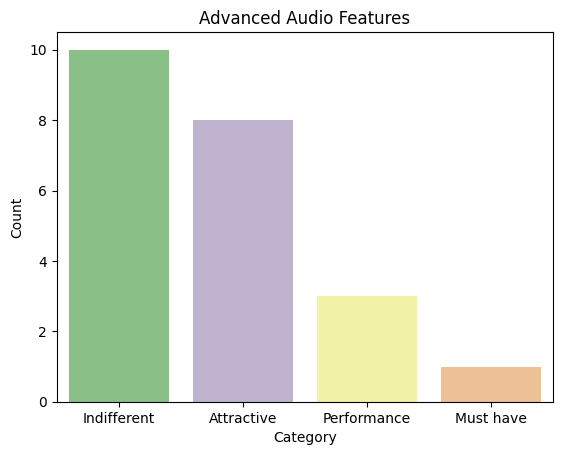

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


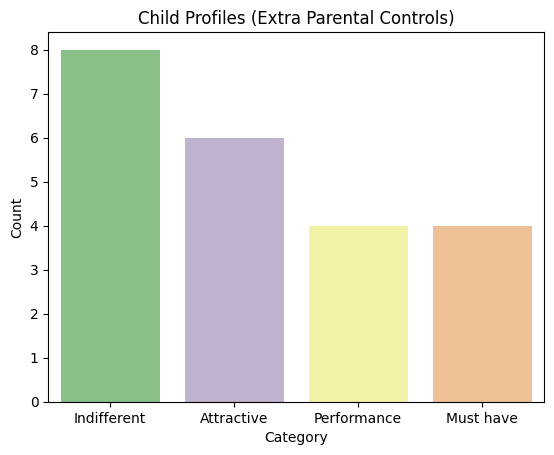

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


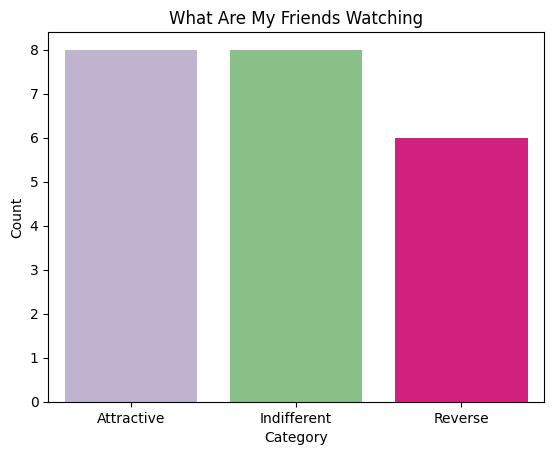

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


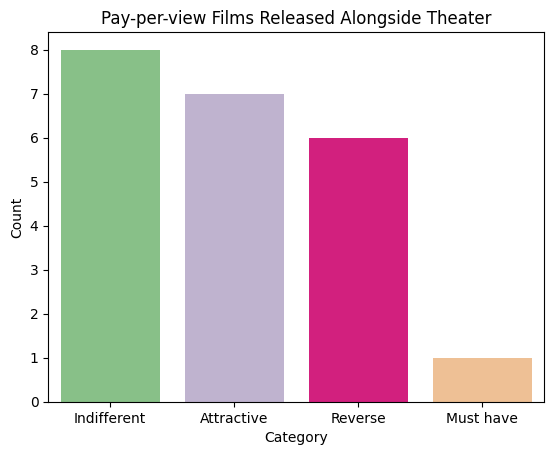

/var/folders/tv/fcngmssj30j40h_54jnx0bmh0000gn/T/ipykernel_81260/1078067512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])


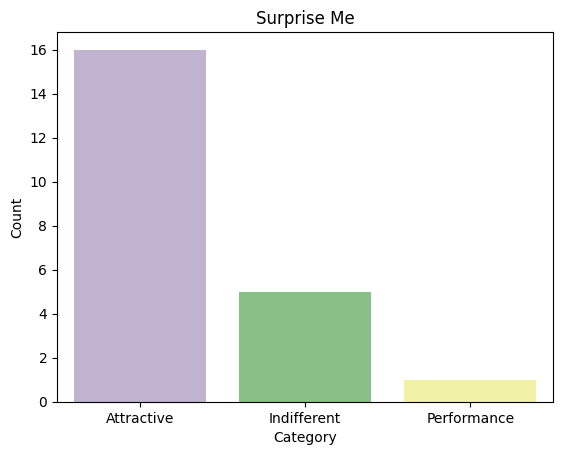

In [202]:
# colors = { label: color  for label, color in zip(['Indifferent', 'Attractive', 'Must have', 'Performance', 'Questionable', 'Reverse'], colormaps["Accent"].colors) }
for i in range(categories.shape[1]):
    # plt.pie(categories[i].value_counts(), labels=categories[i].value_counts().index, autopct='%1.1f%%', colors=[colors[x] for x in categories[i].value_counts().index])
    # plt.bar(categories[i].value_counts().index, categories[i].value_counts())
    sns.barplot(x=categories[i].value_counts().index, y=categories[i].value_counts(), palette=[colors[x] for x in categories[i].value_counts().index])
    plt.title(feature_names[i])
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.savefig(f"media/feature_{i}.png", dpi=300)
    plt.show()

---
## Statistical significance using Fong's Test
A result is statistically significant if 
$$
|a - b| > 1.65 * \sqrt{\frac{(a + b) \times (2n - a - b)}{2n}}
$$
where $a$ and $b$ are the two highest counts and $n$ is the total number of counts.

In [199]:
statistical_significance = []
for i in range(categories.shape[1]):
    a, b = categories[i].value_counts().values[:2]
    n = scores_discrete.shape[0]
    statistical_significance.append((a - b) > (1.65 * np.sqrt(((a + b) * (2*n - a - b)) / (2*n))))
statistical_significance

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True]

In [200]:
np.where(statistical_significance)

(array([ 8, 13]),)